In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
%matplotlib inline

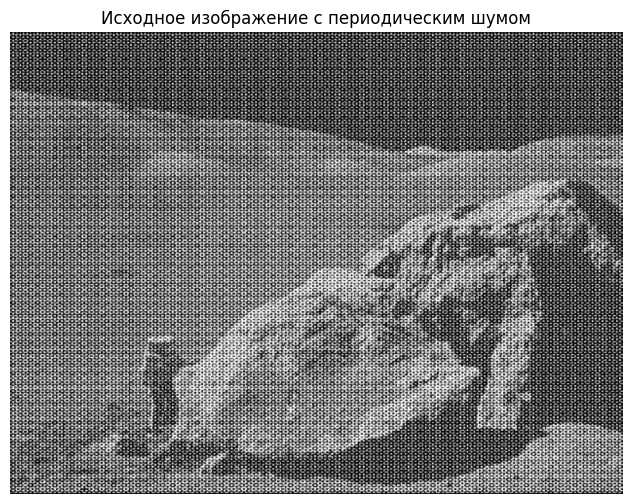

In [15]:
# Загрузка изображения
path = r'C:\\Users\\engfile\\image_processing\\dz5\\periodic_noise.JPG'
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

if img is None:
    raise FileNotFoundError("Не удалось открыть изображение. Проверь путь к файлу!")

plt.figure(figsize=(8, 6))
plt.imshow(img, cmap='gray')
plt.title("Исходное изображение с периодическим шумом")
plt.axis('off')
plt.show()

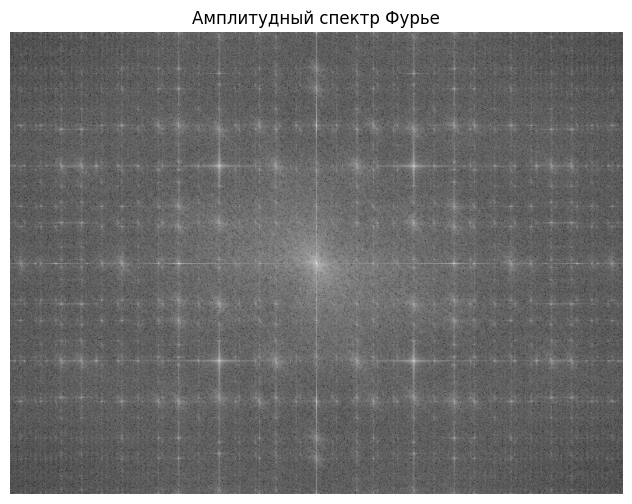

На спектре видны яркие точки - это частоты периодического шума


In [17]:
# Прямое преобразование Фурье
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)

plt.figure(figsize=(8, 6))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Амплитудный спектр Фурье")
plt.axis('off')
plt.show()

print("На спектре видны яркие точки - это частоты периодического шума")

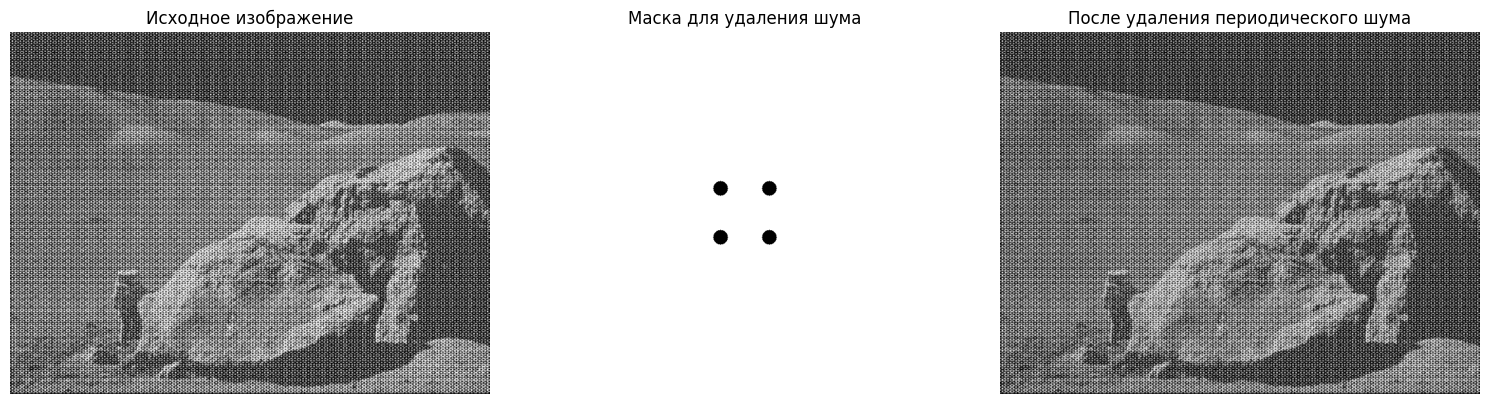

✓ Периодический шум удален


In [18]:
# Создание маски для удаления периодического шума
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2
mask = np.ones((rows, cols), np.uint8)

# Зануляем частоты шума (4 симметричные точки)
r = 12   # радиус выреза
d = 40   # смещение от центра

for dy in [-d, d]:
    for dx in [-d, d]:
        cv2.circle(mask, (ccol + dx, crow + dy), r, 0, -1)

# Применяем маску
fshift_filtered = fshift * mask

# Обратное преобразование Фурье
f_ishift = np.fft.ifftshift(fshift_filtered)
img_filtered = np.fft.ifft2(f_ishift)
img_filtered = np.abs(img_filtered)

# Визуализация результатов
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Исходное изображение")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title("Маска для удаления шума")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_filtered, cmap='gray')
plt.title("После удаления периодического шума")
plt.axis('off')

plt.tight_layout()
plt.show()

print("✓ Периодический шум удален")

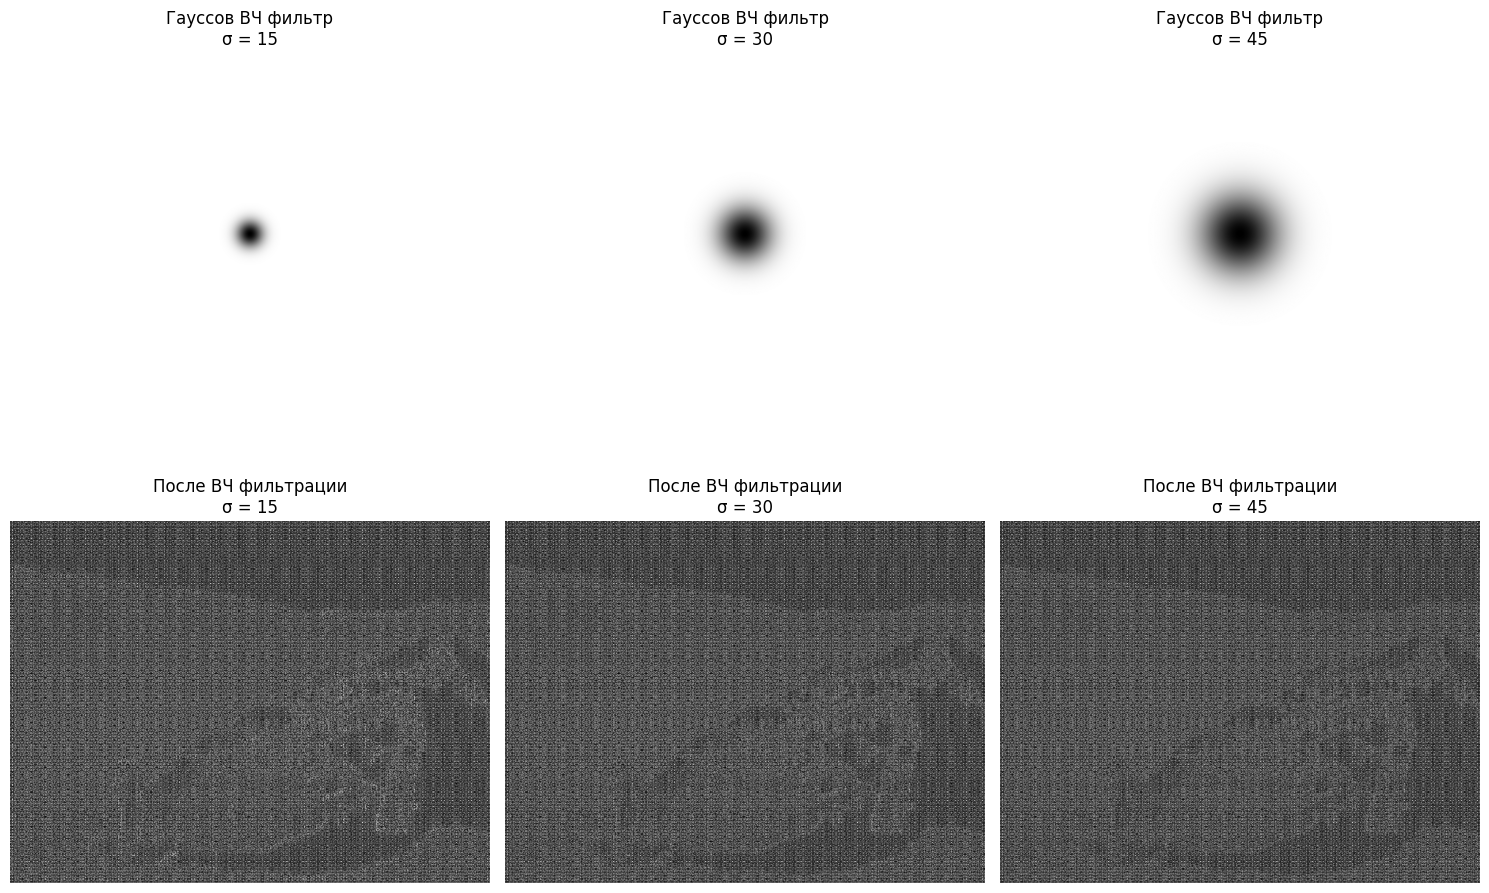

✓ Высокочастотная фильтрация на основе ядра Гаусса реализована


In [19]:
# Создание Гауссова высокочастотного фильтра
def gaussian_highpass_filter(shape, sigma=30):
    """
    Создает Гауссов высокочастотный фильтр
    shape: размеры изображения (rows, cols)
    sigma: параметр Гаусса (чем больше - более мягкий фильтр)
    """
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    
    # Создаем координатную сетку
    x = np.arange(0, cols) - ccol
    y = np.arange(0, rows) - crow
    X, Y = np.meshgrid(x, y)
    distance = np.sqrt(X**2 + Y**2)
    
    # Гауссов низкочастотный фильтр
    gaussian_lowpass = np.exp(-(distance**2) / (2 * sigma**2))
    
    # Высокочастотный фильтр (1 - низкочастотный)
    gaussian_highpass = 1 - gaussian_lowpass
    
    return gaussian_highpass

# Применяем Гауссов ВЧ фильтр с разными параметрами
sigmas = [15, 30, 45]

plt.figure(figsize=(15, 10))

for i, sigma in enumerate(sigmas):
    # Создаем фильтр
    highpass_filter = gaussian_highpass_filter(img.shape, sigma=sigma)
    
    # Применяем к спектру
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    fshift_highpass = fshift * highpass_filter
    
    # Обратное преобразование
    f_ishift_highpass = np.fft.ifftshift(fshift_highpass)
    img_highpass = np.fft.ifft2(f_ishift_highpass)
    img_highpass = np.abs(img_highpass)
    
    # Визуализация
    plt.subplot(2, 3, i + 1)
    plt.imshow(highpass_filter, cmap='gray')
    plt.title(f'Гауссов ВЧ фильтр\nσ = {sigma}')
    plt.axis('off')
    
    plt.subplot(2, 3, i + 4)
    plt.imshow(img_highpass, cmap='gray')
    plt.title(f'После ВЧ фильтрации\nσ = {sigma}')
    plt.axis('off')

plt.tight_layout()
plt.show()

print("✓ Высокочастотная фильтрация на основе ядра Гаусса реализована")

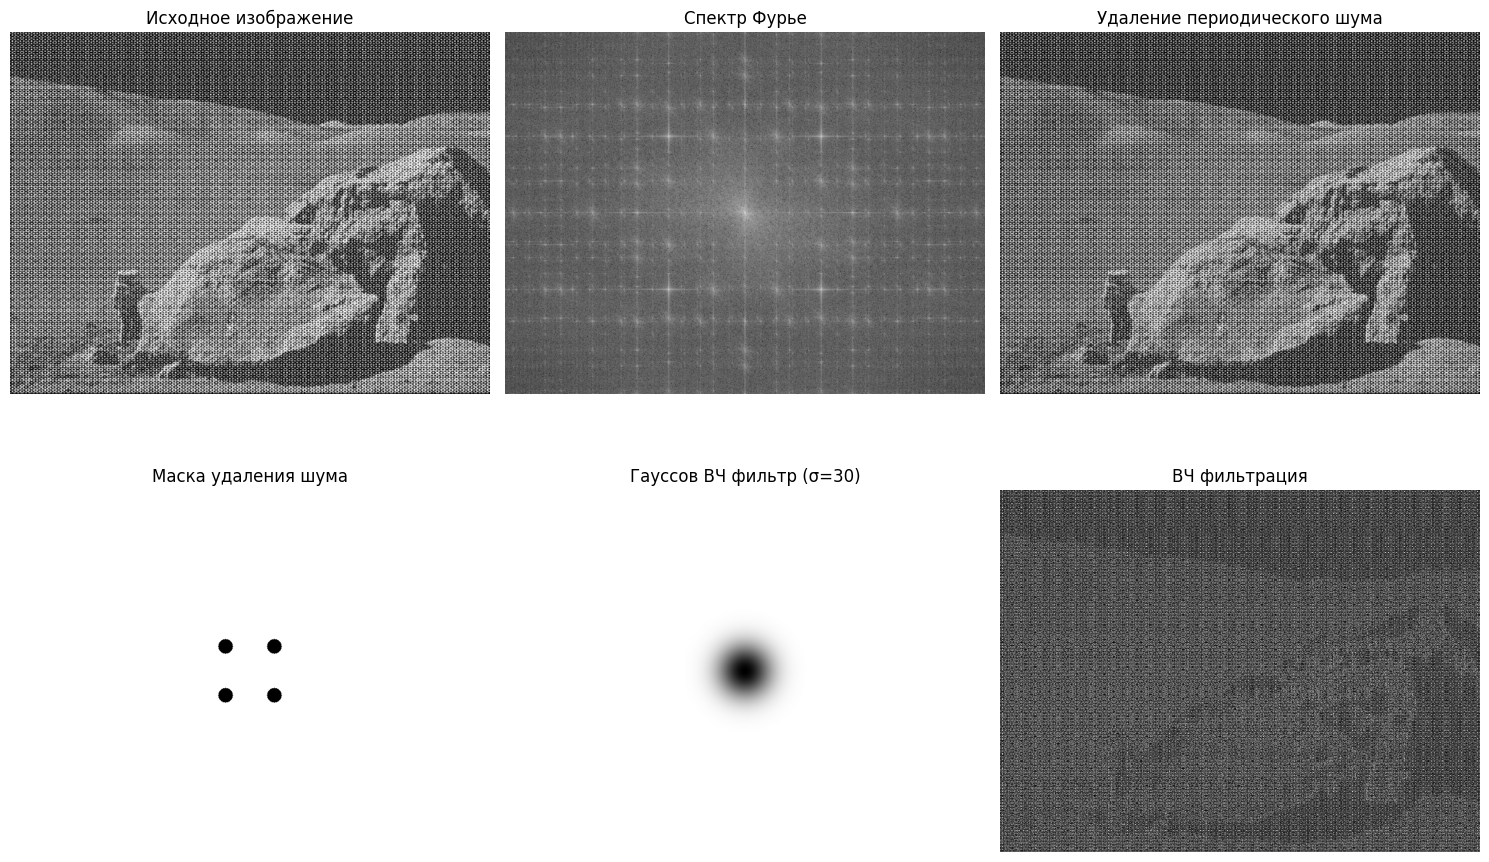

In [20]:
# Сравнение всех методов
plt.figure(figsize=(15, 10))

# Исходное изображение
plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Исходное изображение")
plt.axis('off')

# Спектр Фурье
plt.subplot(2, 3, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Спектр Фурье")
plt.axis('off')

# После удаления периодического шума
plt.subplot(2, 3, 3)
plt.imshow(img_filtered, cmap='gray')
plt.title("Удаление периодического шума")
plt.axis('off')

# Маска для удаления шума
plt.subplot(2, 3, 4)
plt.imshow(mask, cmap='gray')
plt.title("Маска удаления шума")
plt.axis('off')

# ВЧ фильтрация (лучший результат)
highpass_filter = gaussian_highpass_filter(img.shape, sigma=30)
fshift_highpass = fshift * highpass_filter
f_ishift_highpass = np.fft.ifftshift(fshift_highpass)
img_highpass = np.fft.ifft2(f_ishift_highpass)
img_highpass = np.abs(img_highpass)

plt.subplot(2, 3, 5)
plt.imshow(highpass_filter, cmap='gray')
plt.title("Гауссов ВЧ фильтр (σ=30)")
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(img_highpass, cmap='gray')
plt.title("ВЧ фильтрация")
plt.axis('off')

plt.tight_layout()
plt.show()